In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")

In [50]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",home_furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",baby_care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",baby_care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",home_furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",home_furnishing


In [4]:
photo = "44b963eb856b4831dfdd21b666593c95.jpg"
df[df["image"] == photo]["product_category_tree"]

485    ["Computers >> Laptop Accessories >> Batteries...
Name: product_category_tree, dtype: object

In [5]:
df["categorie"] = [c[2:-1].split('>>')[0][0:-1].lower().replace(" ","_") for c in df["product_category_tree"]]

In [89]:

df["description"][df["image"]=="fe05e9ff9e31a310c35626ab6f2b4fe2.jpg"].values

array(['Key Features of TRESemme Naturals Vibrantly Smooth Shampoo Ideal for: Boys, Girls Skin Type: All Skin Types Form: Liquid,TRESemme Naturals Vibrantly Smooth Shampoo (591) Price: Rs. 2,063 Naturals vibrantly smooth shampo.Large 25 ounce size. Tresemme naturals vibrantly smooth shampo,Specifications of TRESemme Naturals Vibrantly Smooth Shampoo (591) Body Wash Essentials Form Liquid Skin Type All Skin Types Ideal For Boys, Girls General Traits Brand TRESemme Quantity 591 Model Name Naturals Vibrantly Smooth Shampoo Model ID TRE-7760 In the Box 1 Smoothing Shampoo'],
      dtype=object)

In [ ]:
#----------------image test -------------------
for root, dir, filenames in os.walk('data/Images'):

    for filename in filenames:
        old_path = root + "/" + filename
        name = filename.split(".")[0]
        cat = df[df["image"] == filename]["categorie"].values
        if cat[0]=="baby_care":
            # read the image
            image = cv2.imread(old_path)
            # show the image
            plt.imshow(image)
            plt.show()
            print(filename)

In [10]:
#----------------image reshape -------------------
for root, dir, filenames in os.walk('data/Images'):

    for filename in filenames:
        old_path = root + "/" + filename
        name = filename.split(".")[0]
        #cat = df[df["image"] == filename]["categorie"].values
        #print(cat)
        # read the image
        image = cv2.imread(old_path)
        resized = cv2.resize(image, (128,128))
        cv2.imwrite(root+"_reshape/"+filename, resized)
        # show the image
        #plt.imshow(image)
        #plt.show()

In [7]:
print(min(liste_taille_1))
#160
print(min(liste_taille_2))
#145
# on reshape : 128*128

160
145


In [9]:
32*2*2

128

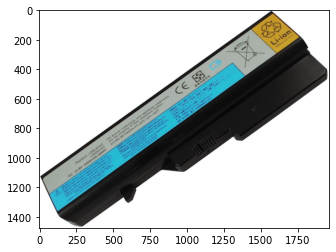

True

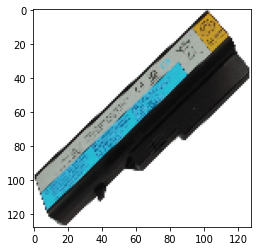

In [6]:
photo = "44b963eb856b4831dfdd21b666593c95.jpg"
im = cv2.imread('data/Images/'+photo)
plt.imshow(im)
plt.show()
resized = cv2.resize(im, (128,128))
plt.imshow(resized)
cv2.imwrite("data/Images_reshape/44b963eb856b4831dfdd21b666593c95.jpg", resized)


# CNN neutal network

In [6]:
# creation dataset image : 
X = []
y = []
dico = {"baby_care":0,"beauty_and_personal_care":1,"computers":2,"home_decor_&_festive_needs":3,"home_furnishing":4,"kitchen_&_dining":5,"watches":6}
for root, dir, filenames in os.walk('data/Images_reshape'):

    for filename in filenames:
        old_path = root + "/" + filename
        # read the image
        image = cv2.imread(old_path)
        X.append(image)
        cat = df[df["image"] == filename]["categorie"].values
        y.append(np.array([dico[cat[0]]]))
X = np.array(X)
y = np.array(y)
print("X_data shape : ", X.shape)
print("y shape : ", y.shape)

X_data shape :  (1050, 128, 128, 3)
y shape :  (1050, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [8]:
X = X/255.0
X_2, X_test, y_2, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_2, y_2, test_size=0.15, random_state=42)


In [9]:
from tensorflow.keras.utils import to_categorical
dummy_y_train = to_categorical( y_train)
dummy_y_test = to_categorical( y_test)
dummy_y_val = to_categorical( y_val)

In [68]:
# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.45))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))

model = Sequential()
model.add(layers.Conv2D(18, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(7, activation='softmax'))

In [69]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 126, 126, 18)      504       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 63, 63, 18)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 61, 61, 32)        5216      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 28800)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)              

In [70]:
model.compile(optimizer='adam', 
             loss="CategoricalCrossentropy",
             metrics=['accuracy'])

history = model.fit(X_train, dummy_y_train, epochs=10, 
                    validation_data=(X_val, dummy_y_val),batch_size=16)

Epoch 1/10
48/48 [==============================] - 5s 101ms/step - loss: 1.9939 - accuracy: 0.1702 - val_loss: 1.8993 - val_accuracy: 0.2537
Epoch 2/10
48/48 [==============================] - 4s 92ms/step - loss: 1.7626 - accuracy: 0.3153 - val_loss: 1.6641 - val_accuracy: 0.3433
Epoch 3/10
48/48 [==============================] - 4s 91ms/step - loss: 1.4775 - accuracy: 0.4512 - val_loss: 1.5431 - val_accuracy: 0.4627
Epoch 4/10
48/48 [==============================] - 4s 92ms/step - loss: 1.1778 - accuracy: 0.5923 - val_loss: 1.6043 - val_accuracy: 0.4328
Epoch 5/10
48/48 [==============================] - 4s 92ms/step - loss: 0.8857 - accuracy: 0.7098 - val_loss: 1.7195 - val_accuracy: 0.4627
Epoch 6/10
48/48 [==============================] - 4s 93ms/step - loss: 0.7165 - accuracy: 0.7665 - val_loss: 1.8253 - val_accuracy: 0.4552
Epoch 7/10
48/48 [==============================] - 5s 96ms/step - loss: 0.5255 - accuracy: 0.8232 - val_loss: 1.9526 - val_accuracy: 0.4701
Epoch 8/10
4

In [56]:
model.evaluate(X_test,dummy_y_test)

5/5 [==============================] - 0s 29ms/step - loss: 1.8100 - accuracy: 0.5000


[1.8100252151489258, 0.5]

[Text(0, 0.5, 'baby_care'),
 Text(0, 1.5, 'beauty_and_personal_care'),
 Text(0, 2.5, 'computers'),
 Text(0, 3.5, 'home_decor_&_festive_needs'),
 Text(0, 4.5, 'home_furnishing'),
 Text(0, 5.5, 'kitchen_&_dining'),
 Text(0, 6.5, 'watches')]

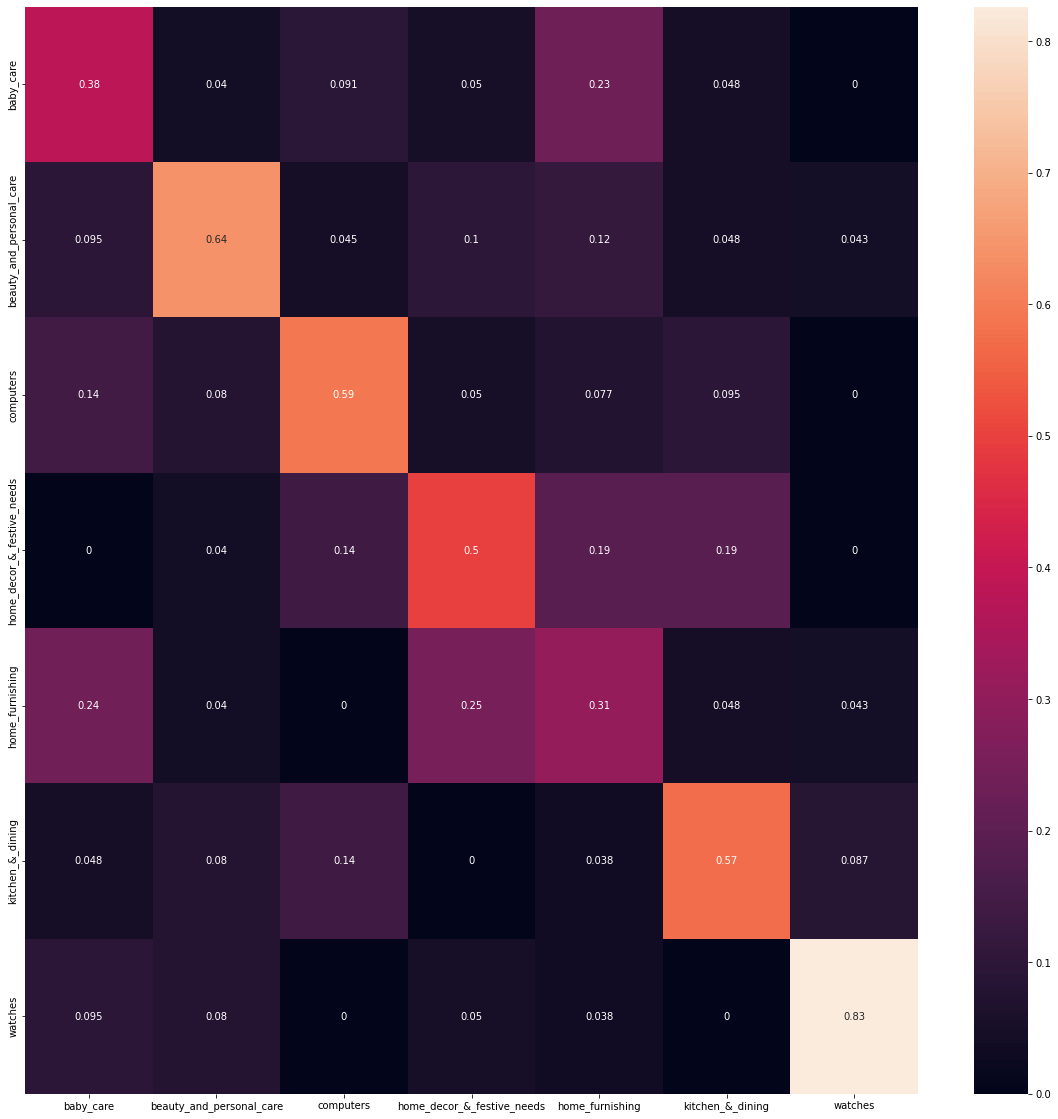

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Predict
y_prediction = model.predict(X_test)
y_prediction.argmax(axis=1)
dummy_y_test.argmax(axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(dummy_y_test.argmax(axis=1), y_prediction.argmax(axis=1) , normalize='pred')
f = plt.figure(figsize=(20,20))
ax = f.add_subplot()
sns.heatmap(result,annot=True,ax=ax)
ax.xaxis.set_ticklabels(dico.keys())
ax.yaxis.set_ticklabels(dico.keys())
